# MOS
MOS was defined by [Glahn and Lowry in 1972](https://www.weather.gov/media/mdl/Glahn_1972.pdf) as the following: 
- Model Output Statistics is an objective weather forecasting technique which consists of determining a statistical relationship between a predictand and variables forecast by a numerical model at some projection time(s). It is, in effect, the determination of the "weather related" statistics of a numerical model.

## 1 data download
### 1.1从aws s3上下载gfs资料

In [1]:
from datetime import datetime,timedelta
import os
from multiprocessing import Pool

In [2]:
resolution:int = 25 # 分辨率

In [3]:
def download_gfs(gfs_input):
    '''
    gfs_input: list 
    gfs_input[0] : datetime
    gfs_input[1] : the forecast hour
    '''
    init_time:datetime = gfs_input[0]
    ifore:int = gfs_input[1]
    print("init_time: ",init_time,"ifore: ",ifore)
    init_year = str(init_time.year).zfill(4)
    init_month = str(init_time.month).zfill(2)
    init_day = str(init_time.day).zfill(2)
    init_hour = str(init_time.hour).zfill(2)

    link = f"s3://noaa-gfs-bdp-pds/gfs.{init_year}{init_month}{init_day}/{init_hour}/atmos/gfs.t{init_hour}z.pgrb2.0p{str(resolution).zfill(2)}.f{str(ifore).zfill(3)}"
    output_dir = os.path.join("/home/ubuntu/data/gfs",f"0p{str(resolution).zfill(2)}",str(init_year),str(init_month),str(init_day),str(init_hour))
    os.makedirs(output_dir,exist_ok=True)
    output_path = os.path.join(output_dir,f"gfs.t{init_hour}z.pgrb2.0p{str(resolution).zfill(2)}.f{str(ifore).zfill(3)}")
    if resolution == 50:
        filesize_limit = 140*1024*1024 
    else: # 25
        filesize_limit = 600*1024*1024 

    if (not os.path.exists(output_path)) or (os.path.getsize(output_path) < filesize_limit):
        print(f"aws s3 cp --no-sign-request {link} {output_dir}")
        os.system(f'aws s3 cp --no-sign-request "{link}" {output_dir}')

In [4]:
# one-day test
 
# set the time and ifore 
gfs_input = []
start_time = datetime(2022,9,1,6)
end_time  = datetime(2022,9,1,6)
while start_time <= end_time:
    for ifcst in range(3, 24+1, 3):
        print("will download:", start_time, ifcst)
        gfs_input.append([start_time,ifcst]) #选择3-24小时的预报场进行订正把
    start_time += timedelta(hours = 6)  
print(gfs_input)

will download: 2022-09-01 06:00:00 3
will download: 2022-09-01 06:00:00 6
will download: 2022-09-01 06:00:00 9
will download: 2022-09-01 06:00:00 12
will download: 2022-09-01 06:00:00 15
will download: 2022-09-01 06:00:00 18
will download: 2022-09-01 06:00:00 21
will download: 2022-09-01 06:00:00 24
[[datetime.datetime(2022, 9, 1, 6, 0), 3], [datetime.datetime(2022, 9, 1, 6, 0), 6], [datetime.datetime(2022, 9, 1, 6, 0), 9], [datetime.datetime(2022, 9, 1, 6, 0), 12], [datetime.datetime(2022, 9, 1, 6, 0), 15], [datetime.datetime(2022, 9, 1, 6, 0), 18], [datetime.datetime(2022, 9, 1, 6, 0), 21], [datetime.datetime(2022, 9, 1, 6, 0), 24]]


In [5]:
start = datetime.now()
with Pool(processes = 4) as p: #这里有几个CPU就可以设为几
    p.map(download_gfs,gfs_input)
print("downloading", 'by multi-processes', datetime.now() - start)

init_time: init_time: init_time: init_time:     2022-09-01 06:00:002022-09-01 06:00:002022-09-01 06:00:00 2022-09-01 06:00:00 ifore:    ifore: ifore:  ifore:  3 1269



aws s3 cp --no-sign-request s3://noaa-gfs-bdp-pds/gfs.20220901/06/atmos/gfs.t06z.pgrb2.0p25.f012 /home/ubuntu/data/gfs/0p25/2022/09/01/06aws s3 cp --no-sign-request s3://noaa-gfs-bdp-pds/gfs.20220901/06/atmos/gfs.t06z.pgrb2.0p25.f003 /home/ubuntu/data/gfs/0p25/2022/09/01/06aws s3 cp --no-sign-request s3://noaa-gfs-bdp-pds/gfs.20220901/06/atmos/gfs.t06z.pgrb2.0p25.f009 /home/ubuntu/data/gfs/0p25/2022/09/01/06aws s3 cp --no-sign-request s3://noaa-gfs-bdp-pds/gfs.20220901/06/atmos/gfs.t06z.pgrb2.0p25.f006 /home/ubuntu/data/gfs/0p25/2022/09/01/06



download: s3://noaa-gfs-bdp-pds/gfs.20220901/06/atmos/gfs.t06z.pgrb2.0p25.f009 to ../../../data/gfs/0p25/2022/09/01/06/gfs.t06z.pgrb2.0p25.f009
init_time: 80.5 MiB/486.9 MiB (29.5 MiB/s) with 1 file(s) remaining  2022-09-01 06:00:00 ifore:  15
aws s3 cp --no-sign-request s3://no

In [6]:
def download_gfs_batch(start_time:datetime,end_time:datetime):
    ''' download the gfs data '''
    gfs_input = []
    while start_time <= end_time:
        for ifcst in range(3, 24+1, 3):
            print("will download:", start_time, ifcst)
            gfs_input.append([start_time,ifcst])
        start_time += timedelta(hours = 6)  #暂且选择3-24小时的预报场进行订正，根据需求来

    with Pool(processes = 4) as p: #这里有几个CPU就可以设为几
        p.map(download_gfs,gfs_input)

数据量比较大，所以还没有批量下载，后面写一个下载完处理的循环。

### 1.2 下载ec数据

In [7]:
with open("/home/ubuntu/.cdsapirc","w") as f:
    f.write("url: https://cds.climate.copernicus.eu/api/v2\n")
    f.write("key: 153832:b903192b-b168-4ae7-a696-87a15709f50d")

In [8]:
import cdsapi
import os  
from multiprocessing import Process
from loguru import logger

logger.add("download.log")  
c = cdsapi.Client()  

In [ ]:
# it's a test, don't need to rerun
c.retrieve(
    "reanalysis-era5-single-levels", 
    {
        'product_type': 'reanalysis',
        'variable': [  
                    '10m_u_component_of_wind', '10m_v_component_of_wind', 
                    '2m_temperature', 'mean_sea_level_pressure', 
                    'surface_pressure', 'total_precipitation',  
                    '2m_dewpoint_temperature'
                ],  
        'pressure_level': '1000',
        'year': '2022',
        'month': '09',
        'day': '30',
        'time': '00:00',
        'format': 'grib',
    },
    'test.grib')

In [9]:
import argparse  
import os  
import time  
from datetime import datetime, timedelta  
from multiprocessing.dummy import Pool  
from typing import List, Tuple  

import cdsapi  
from loguru import logger  

def not_exist_or_small(filename: str) -> bool:  
    # 如果文件不存在或小于特定大小:则返回True  
    if not os.path.exists(filename):  
        return True  
    else:  
        filesize = 2770000000 if filename.endswith("pl.grib") else 12400000 #the size is 12459600 by one single-time test
        if os.path.getsize(filename) < filesize:  
            return True  
        else:  
            return False  
            
def down_sl(download_day: datetime):  
    '''download single-level data in ERA5'''
    logger.info(f"Downloading single levels for {download_day:%Y-%m-%d}")  
    year: str = download_day.strftime("%Y")  
    month: str = download_day.strftime("%m")  
    day: str = download_day.strftime("%d")  
    filename: str = os.path.join("/home/ubuntu/data/era5", "data", year, month, f"{download_day:%Y%m%d}_sl.grib")  
    
    os.makedirs(os.path.join("/home/ubuntu/data/era5","data", year, month), exist_ok=True)

    if not_exist_or_small(filename):  
        r = c.retrieve(  
            "reanalysis-era5-single-levels",  
            {  
                "product_type": "reanalysis",  
                "format": "grib",  
                'variable': [  
                    '10m_u_component_of_wind', '10m_v_component_of_wind', 
                    '2m_temperature', 'mean_sea_level_pressure', 
                    'surface_pressure', 'total_precipitation',  
                    '2m_dewpoint_temperature'
                ],  
                'time': [  
                    '00:00', '01:00', '02:00',  
                    '03:00', '04:00', '05:00',  
                    '06:00', '07:00', '08:00',  
                    '09:00', '10:00', '11:00',  
                    '12:00', '13:00', '14:00',  
                    '15:00', '16:00', '17:00',  
                    '18:00', '19:00', '20:00',  
                    '21:00', '22:00', '23:00',  
                ],  
                "year": year,  
                "month": month,  
                "day": day,  
                "area": [90, 0, 0, 180],  
            },  
            filename
        )  

        r.delete()  
        time.sleep(5)  
    else:  
        logger.warning(f"{filename} already exists")  
        logger.success(f"successfully download single levels for {download_day:%Y-%m-%d}")  
    return 0

In [10]:
def download_era5(start: str, end: str):  
    start_time: datetime = datetime.strptime(start, "%Y%m%d")  # 开始时间  
    end_time: datetime = datetime.strptime(end, "%Y%m%d")  # 结束时间  
    logger.info(f"start download: {start_time:%Y-%m-%d} to {end_time:%Y-%m-%d}")  

    joblist: List[Tuple[datetime, str]] = []  # allocate an empty list, it's made of tuples (datetime:datetime, str:str)
    while start_time <= end_time:  
        for i in ["sl"]:  # 这里可以修改，只下载sl还是也下载pl(pressure level) ,["sl", ""pl""]
            joblist.append((start_time, i))  
        start_time += timedelta(days=1)  

    print([x[0] for x in joblist]) #嵌套列表取值

    # 注意，每个用户同时最多接受12个request https://cds.climate.copernicus.eu/vision  
    # create 4 threads  
    with Pool(processes = 4) as p: #depends on how many CPUs your computer has
        jobs = [x[0] for x in joblist]
        p.map(down_sl ,jobs)

In [14]:
download_era5(start="20220901", end="20220928") #cost ~ 3 min for one-month data with 4 CPUs 

2022-10-04 16:05:29.499 | INFO     | __main__:download_era5:4 - start download: 2022-09-01 to 2022-09-28
2022-10-04 16:05:29.503 | INFO     | __main__:down_sl:23 - Downloading single levels for 2022-09-01
2022-10-04 16:05:29.504 | INFO     | __main__:down_sl:23 - Downloading single levels for 2022-09-03
2022-10-04 16:05:29.504 | INFO     | __main__:down_sl:23 - Downloading single levels for 2022-09-05
2022-10-04 16:05:29.508 | INFO     | __main__:down_sl:23 - Downloading single levels for 2022-09-07


[datetime.datetime(2022, 9, 1, 0, 0), datetime.datetime(2022, 9, 2, 0, 0), datetime.datetime(2022, 9, 3, 0, 0), datetime.datetime(2022, 9, 4, 0, 0), datetime.datetime(2022, 9, 5, 0, 0), datetime.datetime(2022, 9, 6, 0, 0), datetime.datetime(2022, 9, 7, 0, 0), datetime.datetime(2022, 9, 8, 0, 0), datetime.datetime(2022, 9, 9, 0, 0), datetime.datetime(2022, 9, 10, 0, 0), datetime.datetime(2022, 9, 11, 0, 0), datetime.datetime(2022, 9, 12, 0, 0), datetime.datetime(2022, 9, 13, 0, 0), datetime.datetime(2022, 9, 14, 0, 0), datetime.datetime(2022, 9, 15, 0, 0), datetime.datetime(2022, 9, 16, 0, 0), datetime.datetime(2022, 9, 17, 0, 0), datetime.datetime(2022, 9, 18, 0, 0), datetime.datetime(2022, 9, 19, 0, 0), datetime.datetime(2022, 9, 20, 0, 0), datetime.datetime(2022, 9, 21, 0, 0), datetime.datetime(2022, 9, 22, 0, 0), datetime.datetime(2022, 9, 23, 0, 0), datetime.datetime(2022, 9, 24, 0, 0), datetime.datetime(2022, 9, 25, 0, 0), datetime.datetime(2022, 9, 26, 0, 0), datetime.datetime(20

2022-10-04 16:05:30,238 INFO Welcome to the CDS
2022-10-04 16:05:30,239 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-10-04 16:05:30,253 INFO Welcome to the CDS
2022-10-04 16:05:30,254 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-10-04 16:05:30,266 INFO Welcome to the CDS
2022-10-04 16:05:30,267 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-10-04 16:05:30,269 INFO Welcome to the CDS
2022-10-04 16:05:30,270 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-10-04 16:05:30,443 INFO Request is queued
2022-10-04 16:05:31,635 INFO Request is running
2022-10-04 16:05:31,636 INFO Request is running
2022-10-04 16:05:39,326 INFO Request is completed
2022-10-04 16:05:39,327 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-co

## 2 准备训练集

In [11]:
import argparse
import configparser
import glob
import multiprocessing
import os
from datetime import datetime, timedelta
from functools import partial
from multiprocessing import Pool
from typing import Dict, List
import numba
import numpy as np
import pandas as pd
import xarray as xr
from dateutil.parser import parse
from loguru import logger
import pygrib as pg

In [12]:
#test one single data
path = "/home/ubuntu/data/gfs/0p25/2022/09/01/00"
file = "gfs.t00z.pgrb2.0p25.f003"
grib_file = pg.open( os.path.join(path, file) )
with open('var_name.txt', 'w') as out_file:
    for i in grib_file:
        #print(type(i)) 看看变量都有啥的，但是好像也看不出来
        out_file.write(str(i) + '\n')

In [13]:
ds = xr.open_dataset(os.path.join(path,"gfs.t00z.pgrb2.0p25.f003"), engine="cfgrib", filter_by_keys={"shortName": "2r"})

In [14]:
ds['r2']

<xarray.DataArray 'r2' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
    time               datetime64[ns] ...
    step               timedelta64[ns] ...
    heightAboveGround  float64 ...
  * latitude           (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude          (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time         datetime64[ns] ...
Attributes:
    GRIB_paramId:                             260242
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         heightAboveGround
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  1440
    GRIB_Ny:                                  721
    GRIB_cfName:                              relative_humidity
    GRIB_cfVarName:                           r2
    GRIB_gridDefinitionDescription:           Latitude/longitude. Also called...
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.75
    GRIB_missingValue:                        9999
    GRIB_name:                                2 metre relative humidity
    GRIB_shortName:                           2r
    GRIB_units:                               %
    long_name:                                2 metre relative humidity
    units:                                    %
    standard_name:                            relative_humidity

In [15]:
# variables in gfs have both the long name and their corresponding var name
varname = ["t2m", "r2", "d2m", "u10", "v10", "mslet" ]
short_name = ["2t", "2r", "2d", "10u", "10v", "mslet"]
var_short_dict = dict(zip(varname, short_name))
print(var_short_dict.keys())
print(list(var_short_dict.keys()))


dict_keys(['t2m', 'r2', 'd2m', 'u10', 'v10', 'mslet'])
['t2m', 'r2', 'd2m', 'u10', 'v10', 'mslet']


In [16]:
# put the wanted variables into a dictionary 
dr = {}
for key,value in var_short_dict.items():
    print(key, value)
    dr[key] = xr.open_dataset(os.path.join(path,file), engine="cfgrib", filter_by_keys={"shortName": value})[key]

t2m 2t
r2 2r
d2m 2d
u10 10u
v10 10v
mslet mslet


In [18]:
# slice for the dictionary gfs dataset
# sel can help select the location of interest
dr['mslet'].sel(latitude=slice(90, 0), longitude=slice(0, 180)) 

<xarray.DataArray 'mslet' (latitude: 361, longitude: 721)>
[260281 values with dtype=float32]
Coordinates:
    time        datetime64[ns] 2022-09-01
    step        timedelta64[ns] 03:00:00
    meanSea     float64 0.0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 179.5 179.8 180.0
    valid_time  datetime64[ns] 2022-09-01T03:00:00
Attributes:
    GRIB_paramId:                             260317
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         meanSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  1440
    GRIB_Ny:                                  721
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           unknown
    GRIB_gridDefinitionDescription:           Latitude/longitude. Also called...
    GRIB_iDirectionIncrementInDegrees:        0.25
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.25
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.75
    GRIB_missingValue:                        9999
    GRIB_name:                                MSLP (Eta model reduction)
    GRIB_shortName:                           mslet
    GRIB_units:                               Pa
    long_name:                                MSLP (Eta model reduction)
    units:                                    Pa
    standard_name:                            unknown

In [19]:
# organize above into a function.
def get_var_gfs(data_dir: str, file_time: datetime, ifore : int, var_short_dict: dict ):
    '''
    usage: substract the variables of interest in GFS data into a dictionary dataset
    
    params var_short_dict:  var_name <-> short_name
        eg:  var_name: ['t2m', 'r2', 'd2m', 'u10', 'v10', 'mslet'] 
            d2m: 2m dewpoint temperature; mslet: mean sea level pressure using eta reduction. 

    return dr: a dictionary made of variables:xr.DataArray
    '''
    filename = os.path.join(data_dir,  
        f"{file_time:%Y}",
        f"{file_time:%m}",
        f"{file_time:%d}",
        f"{file_time:%H}",
        f"{file_time:gfs.t%Hz.pgrb2.0p25.f{str(ifore).zfill(3)}}") #格式化打印方法
    
    if False in [ list(var_short_dict.keys())[i] in ['t2m', 'r2', 'd2m', 'u10', 'v10', 'mslet'] for i in range(0,len(var_short_dict.items())) ]:
        raise ValueError("we haven't considered the varname yet")
    else: 
        dr = {}
        for var_name,short_name in var_short_dict.items():
            dr[var_name] = xr.open_dataset(filename, engine="cfgrib", filter_by_keys={"shortName": short_name})[var_name].sel(latitude=slice(90, 0), longitude=slice(0, 180)) 
            #shortName和varname不一样，还都需要用到，一一对应，所以建立了dict
    return dr  

In [22]:
def get_var_era5(data_dir: str, file_time: datetime, var_short_dict: dict ):
    '''
    usage: substract the variables of interest in era5 data into a dictionary dataset
    
    params var_short_dict:  var_name <-> short_name
        eg:  var_name: ['t2m', 'r2', 'd2m', 'u10', 'v10', 'mslet'] 
            d2m: 2m dewpoint temperature; mslet: mean sea level pressure using eta reduction. 

    return dr: a dictionary made of variables:xr.DataArray     
    '''
    # /home/ubuntu/data/era5/data/
    filename = os.path.join(data_dir,  
        f"{file_time:%Y}",
        f"{file_time:%m}",
        f"{file_time:%Y%m%d}"+"_sl.grib") #formatted printing
    if False in [ list(var_short_dict.keys())[i] in ['t2m', 'r2', 'd2m', 'u10', 'v10', 'msl'] for i in range(0,len(var_short_dict.items())) ]:
        raise ValueError("we haven't considered the varname yet")
    else:
        dr = {}
        for var_name,short_name in var_short_dict.items():
            if var_name == 'r2':
                # using temperature and dewpoint to calculate relative humidity
                t2m = xr.open_dataset(filename, engine="cfgrib", filter_by_keys={"shortName": "2t"})["t2m"].sel(time=file_time)
                d2m = xr.open_dataset(filename, engine="cfgrib", filter_by_keys={"shortName": "2d"})["d2m"].sel(time=file_time)
                gc = 461.5  # [j/{kg-k}]   gas constant water vapor
                gc = gc / (1000.0 * 4.186)  # [cal/{g-k}]  change units
                # lhv=latent heat vap
                lhv = 597.3 - 0.57 * (t2m - 273.15)  # dutton top p273 [empirical]
                rh = np.exp((lhv / gc) * (1.0 / t2m - 1.0 / d2m))  # type: ignore
                dr[var_name] = rh * 100.
            else:
                dr[var_name] = xr.open_dataset(filename, engine="cfgrib", filter_by_keys={"shortName": short_name})[var_name].sel(time=file_time)

    return dr  

In [5]:
path = "/home/ubuntu/data/era5/data/2022/09"
t2 = xr.open_dataset(os.path.join(path,"20220904_sl.grib"), engine="cfgrib", filter_by_keys={"shortName": "2t"})
t2#['t2m'].sel(time=datetime(2022,9,4,22))

<xarray.Dataset>
Dimensions:     (time: 24, latitude: 361, longitude: 721)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2022-09-04 ... 2022-09-04T23:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... 0.75 0.5 0.25 0.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 179.5 179.8 180.0
    valid_time  (time) datetime64[ns] ...
Data variables:
    t2m         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-10-04T16:15 GRIB to CDM+CF via cfgrib-0.9.1...

In [23]:
@numba.jit
def get_nearby(a: np.ndarray, radius: int) -> np.ndarray:
    """
    usage: given an array of shape (x,y), get the neighbour points (radius)
        for every grid point, return an array of n*y*radius
    author: haiqin chen

    :param a: the input array
    :type a: np.ndarray
    :return b: the output array
    :type b: np.ndarray
    """
    b = np.zeros(shape=(a.shape[0],a.shape[1],(2*radius+1)**2 ),dtype = float)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            ''' 这种写法jit不支持。jit支持的语法包括：https://numba.pydata.org/numba-doc/latest/reference/pysupported.html#pysupported
            aa = [[a[ii][jj] if ii >= 0 and ii < a.shape[0] and jj >= 0 and jj < a.shape[1] else np.nan \
                for jj in range(j-radius, j+radius+1)]
                    for ii in range(i-radius, i+radius+1)] #ii 表示行，在外，#+1是因为取不到
            b[i,j,:] = np.array(aa).reshape(-1)
            '''
            n = 0
            for ii in range(i-radius, i+radius+1):
                for jj in range(j-radius, j+radius+1):
                    if ii >= 0 and ii < a.shape[0] and jj >= 0 and jj < a.shape[1]:
                        b[i,j,n] = a[ii][jj]
                    else:
                        b[i,j,n] = np.nan
                    n = n + 1            
                
    return b
    
def prepare_csv(
    file_time: datetime,
    ifore: int,
    gfs_varname_dict: dict[str,str],  #  ["t2m","r2","d2m","u10","v10","pres"]
    era5_varname_dict: dict[str,str],  # = ["t2m","r2", "u10","v10","pres"],
    gfs_data_dir: str,    
    era5_data_dir: str,    
    save_dir: str) -> None:
    '''
    :param file_time:         datetime, 每次的gfs预测起始时间（UTC）
    :param ifore:             int, 预报的时次
    :param gfs_varname_dict:  List[str], 存储gfs变量的列表
    :param era5_varname_dict: List[str], 存储era5变量的列表
    :param gfs_data_dir:      str, gfs存储路径
    :param era5_data_dir:     str, era5存储路径
    :param save_dir:          str, csv文件存储路径
    '''
    csv_save_path: str = os.path.join(save_dir,
        f"{file_time:%Y}",
        f"{file_time:%m}",
        f"{file_time:%Y%m%d%H%M%S}_{ifore}.csv",
    )
    if os.path.exists(csv_save_path):
        logger.warning(f"{file_time:%Y%m%d%H%M%S}_{ifore}.csv exists")
    else:
        logger.info(f"begin the process to save the training data file: {file_time:%Y%m%d%H%M%S}_{ifore}.csv")

        # get the variables from GFS and ERA5 data
        gfs_dict = get_var_gfs(data_dir = gfs_data_dir, file_time=file_time, ifore=ifore, var_short_dict=gfs_varname_dict)
        ana_time: datetime = file_time + timedelta(hours=ifore)
        era5_dict = get_var_era5(data_dir=era5_data_dir, file_time=ana_time, var_short_dict=era5_varname_dict)

        len_lat, len_lon = 361, 721 
        # 二维经纬度列表
        array_lat = np.zeros((len_lat, len_lon), dtype=np.float32)
        array_lon = np.zeros((len_lat, len_lon), dtype=np.float32)
        for i in range(0, len_lat, 1):  
            for j in range(0, len_lon, 1):
                array_lat[i, j] = 90 - i * 0.25
                array_lon[i, j] = 0.0 + j * 0.25

        array_total = np.zeros((len_lat, len_lon, 0), dtype=np.float32)
        column_list: List = []

        # 数组叠加拼接
        array_total = np.concatenate((array_total, array_lat[:, :, np.newaxis]), axis=2) #np.newaxis的功能是增加新的维度, 放在哪个位置，就会给哪个位置增加维度,这里理解为竖着存放
        array_total = np.concatenate((array_total, array_lon[:, :, np.newaxis]), axis=2)
        column_list.append("lat")
        column_list.append("lon")

        # ifore列表
        array_ifore = np.ones((len_lat, len_lon), dtype=np.float32) * ifore
        array_total = np.concatenate((array_total, array_ifore[:, :, np.newaxis]), axis=2)
        column_list.append("ifore")

        # 叠加gfs9格点和era5数据
        for i_var_era5 in list(era5_varname_dict.keys()):
            array_era5 = era5_dict[i_var_era5].values
            array_total = np.concatenate((array_total, array_era5[:, :, np.newaxis]), axis=2)
            column_list.append(i_var_era5)

        for i_var_gfs in list(gfs_varname_dict.keys()):
            array_gfs = get_nearby(gfs_dict[i_var_gfs].values,1)
            array_total = np.concatenate((array_total, array_gfs), axis=2)
            for i in range(9):
                column_list.append(i_var_gfs + "_" + str(i))
        
        array_total = np.reshape(array_total, (len_lat * len_lon, -1)) #原来是维度是（361，721，n），n个特征，展开为（361*721，n）

        df = pd.DataFrame(array_total, columns=column_list)
        os.makedirs(os.path.join(save_dir, f"{file_time:%Y}", f"{file_time:%m}"), exist_ok=True)
        df.to_csv(csv_save_path)
        logger.success(f"{file_time:%Y%m%d%H%M%S}_{ifore}.csv done")

    return 1

In [24]:
a = np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6]])

get_nearby(a,1)[1][0]

array([nan,  1.,  2., nan,  2.,  3., nan,  3.,  4.])

In [25]:
gfs_data_dir: str = "/home/ubuntu/data/gfs/0p25"
era5_data_dir: str = "/home/ubuntu/data/era5/data/"
start_time_list: List[datetime] = [parse(a.split("0p")[-1][3:]) for a in glob.glob(os.path.join(gfs_data_dir, "20??", "??", "??", "??"))]
csv_save_dir: str = "/home/ubuntu/work/MOS/train_csv/"
os.makedirs(csv_save_dir, exist_ok=True)

for i in glob.glob(os.path.join(gfs_data_dir, "20??", "??", "??", "??", "*.idx")):
    os.system(f"rm {i}")

for i in glob.glob(os.path.join(era5_data_dir, "20??", "??", "*.idx")):
     os.system(f"rm {i}")

varname = ["t2m", "r2", "d2m", "u10", "v10", "mslet" ]
short_name = ["2t", "2r", "2d", "10u", "10v", "mslet"] # mslet: mean sea-level pressure
var_short_dict_gfs = dict(zip(varname, short_name))

varname = ["t2m", "r2", "d2m", "u10", "v10", "msl" ]
short_name = ["2t", "2r", "2d", "10u", "10v", "msl"]
var_short_dict_era5 = dict(zip(varname, short_name))

save_func = partial(
    prepare_csv,
    gfs_varname_dict=var_short_dict_gfs,
    era5_varname_dict=var_short_dict_era5,
    gfs_data_dir=gfs_data_dir,
    era5_data_dir=era5_data_dir,
    save_dir=csv_save_dir) #partial:固定函数的一些参数

job_list = []
for dtime in start_time_list:
    for ifcst in range(3, 24+1, 3):
        job_list.append((dtime, ifcst))
        #[(datetime.datetime(2022, 9, 1, 6, 0), 3),  (datetime.datetime(2022, 9, 1, 6, 0), 6), ...]

njobs: int = multiprocessing.cpu_count()

with Pool(njobs) as p:
    p.starmap(save_func, job_list)

#no jit 2m 32s
#with jit 1m 30s

2022-10-23 13:08:01.494 | INFO     | __main__:prepare_csv:58 - begin the process to save the training data file: 20220901060000_9.csv
2022-10-23 13:08:01.494 | INFO     | __main__:prepare_csv:58 - begin the process to save the training data file: 20220901060000_3.csv
2022-10-23 13:08:01.494 | INFO     | __main__:prepare_csv:58 - begin the process to save the training data file: 20220901060000_6.csv
2022-10-23 13:08:01.495 | INFO     | __main__:prepare_csv:58 - begin the process to save the training data file: 20220901060000_12.csv
2022-10-23 13:08:07,772 ERROR Can't read index file '/home/ubuntu/data/era5/data/2022/09/20220901_sl.grib.02ccc.idx'
Traceback (most recent call last):
  File "/opt/conda/envs/pytorch/lib/python3.9/site-packages/cfgrib/messages.py", line 535, in from_indexpath_or_filestream
    self = cls.from_indexpath(indexpath)
  File "/opt/conda/envs/pytorch/lib/python3.9/site-packages/cfgrib/messages.py", line 417, in from_indexpath
    index = pickle.load(file)
EOFError

## 3 训练模型

In [26]:
os.cpu_count()

4

In [27]:
# should "pip install dask distributed graphviz" for visualization
import dask.dataframe as dd
from dask.distributed import Client

import os
import pickle
import lightgbm as lgb
from dask import delayed
from dask_ml.model_selection import RandomizedSearchCV # 还没有用到，后面调整参数试试
#dask支持并行模型训练和预测：dask-ml。
from loguru import logger

# dask_ml.model_selection.train_test_split 分测试集这些也还没用到

In [28]:
import os
client = Client(n_workers = os.cpu_count())

In [29]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 59.85 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42539,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 59.85 GiB
Comm: tcp://127.0.0.1:34601,Total threads: 1
Dashboard: http://127.0.0.1:33163/status,Memory: 14.96 GiB
Nanny: tcp://127.0.0.1:42901,


In [ ]:
def save_model(client, era5_var, model_dir):
    os.makedirs(model_dir, exist_ok=True)
    #批量读取

    ddf = dd.read_csv(os.path.join(save_csv ,"20??","??","*.csv"))
    ddf = ddf.drop

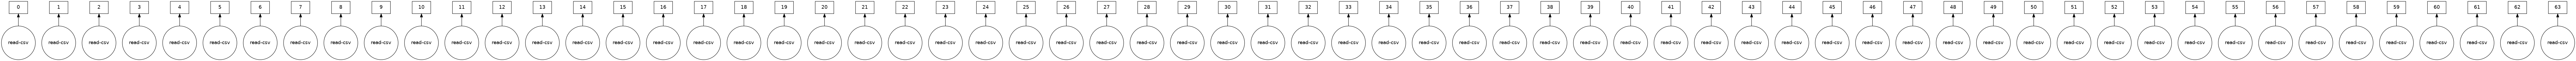

In [30]:
csv_dir = "/home/ubuntu/data/MOS_out/train_csv"
ddf = dd.read_csv(os.path.join(csv_dir,"20??","??","*.csv"),  \
    dtype=float)
ddf.astype({"ifore": "int16"})
ddf.visualize()

In [31]:
len(ddf)

4164496

In [32]:
ddf.head()

,Unnamed: 0,lat,lon,ifore,t2m,r2,d2m,u10,v10,msl,...,v10_8,mslet_0,mslet_1,mslet_2,mslet_3,mslet_4,mslet_5,mslet_6,mslet_7,mslet_8
0,0.0,90.0,0.00,12.0,272.218018,96.403023,271.718323,0.268539,0.381516,101693.5625,...,3.922495,NaN,NaN,NaN,NaN,101770.070312,101770.070312,NaN,101775.070312,101775.070312
1,1.0,90.0,0.25,12.0,272.218018,96.403023,271.718323,0.268539,0.381516,101693.5625,...,3.922495,NaN,NaN,NaN,101770.070312,101770.070312,101770.070312,101775.070312,101775.070312,101775.070312
2,2.0,90.0,0.50,12.0,272.218018,96.403023,271.718323,0.268539,0.381516,101693.5625,...,3.922495,NaN,NaN,NaN,101770.070312,101770.070312,101770.070312,101775.070312,101775.070312,101775.265625
3,3.0,90.0,0.75,12.0,272.218018,96.403023,271.718323,0.268539,0.381516,101693.5625,...,3.932495,NaN,NaN,NaN,101770.070312,101770.070312,101770.070312,101775.070312,101775.265625,101775.265625
4,4.0,90.0,1.00,12.0,272.218018,96.403023,271.718323,0.268539,0.381516,101693.5625,...,3.932495,NaN,NaN,NaN,101770.070312,101770.070312,101770.070312,101775.265625,101775.265625,101775.265625


In [33]:
ddf = ddf.drop(columns=['Unnamed: 0'])

In [34]:
ddf.columns.values

array(['lat', 'lon', 'ifore', 't2m', 'r2', 'd2m', 'u10', 'v10', 'msl',
       't2m_0', 't2m_1', 't2m_2', 't2m_3', 't2m_4', 't2m_5', 't2m_6',
       't2m_7', 't2m_8', 'r2_0', 'r2_1', 'r2_2', 'r2_3', 'r2_4', 'r2_5',
       'r2_6', 'r2_7', 'r2_8', 'd2m_0', 'd2m_1', 'd2m_2', 'd2m_3',
       'd2m_4', 'd2m_5', 'd2m_6', 'd2m_7', 'd2m_8', 'u10_0', 'u10_1',
       'u10_2', 'u10_3', 'u10_4', 'u10_5', 'u10_6', 'u10_7', 'u10_8',
       'v10_0', 'v10_1', 'v10_2', 'v10_3', 'v10_4', 'v10_5', 'v10_6',
       'v10_7', 'v10_8', 'mslet_0', 'mslet_1', 'mslet_2', 'mslet_3',
       'mslet_4', 'mslet_5', 'mslet_6', 'mslet_7', 'mslet_8'],
      dtype=object)

In [35]:
X = ddf.drop(columns=['t2m', 'r2', 'd2m', 'u10', 'v10', 'msl'])
# target variable for MOS
var_MOS = 't2m'
y = ddf[[var_MOS]]

In [36]:
print("X.shape: ",X.shape)
print("y.shape: ",y.shape)

X.shape:  (Delayed('int-79e9c3a9-e684-4ba3-8009-0d28283422f9'), 57)
y.shape:  (Delayed('int-35a24779-97f1-4e5c-a27d-cdf1d5daa95d'), 1)


In [37]:
help(lgb.DaskLGBMRegressor)

Help on class DaskLGBMRegressor in module lightgbm.dask:

class DaskLGBMRegressor(lightgbm.sklearn.LGBMRegressor, _DaskLGBMModel)
 |  DaskLGBMRegressor(boosting_type: str = 'gbdt', num_leaves: int = 31, max_depth: int = -1, learning_rate: float = 0.1, n_estimators: int = 100, subsample_for_bin: int = 200000, objective: Union[str, Callable, NoneType] = None, class_weight: Union[dict, str, NoneType] = None, min_split_gain: float = 0.0, min_child_weight: float = 0.001, min_child_samples: int = 20, subsample: float = 1.0, subsample_freq: int = 0, colsample_bytree: float = 1.0, reg_alpha: float = 0.0, reg_lambda: float = 0.0, random_state: Union[int, numpy.random.mtrand.RandomState, NoneType] = None, n_jobs: int = -1, silent: bool = 'warn', importance_type: str = 'split', client: Optional[distributed.client.Client] = None, **kwargs: Any)
 |  
 |  Distributed version of lightgbm.LGBMRegressor.
 |  
 |  Method resolution order:
 |      DaskLGBMRegressor
 |      lightgbm.sklearn.LGBMRegressor


这里只用默认的LGM回归方法，还可以适当调整[参数](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html)

参考资料：
* https://towardsdatascience.com/hyper-parameter-tuning-in-python-1923797f124f
* https://towardsdatascience.com/supercharging-hyperparameter-tuning-with-dask-ab2c28788bcf （比较吻合我的需要）

In [39]:
model = lgb.DaskLGBMRegressor(n_jobs=os.cpu_count())  

model.fit(X, y)

Finding random open ports for workers
[LightGBM] [Info] Listening...
[LightGBM] [Info] Listening...
[LightGBM] [Info] Listening...
[LightGBM] [Info] Listening...


DaskLGBMRegressor(num_threads=1, time_out=120, tree_learner='data')

## 4 准备测试数据集

In [50]:
y_pred = model.predict(X)

In [ ]:
y_pred = np.reshape(y_pred.compute(), (16, len_lat, len_lon))
            y[i, :, :, :] = y_temp

In [53]:
y_pred.compute().shape

(2082248,)

In [55]:
2082248/361/721

8.0

In [56]:
y.compute().shape

(2082248, 1)